# EDA

In [26]:
import pandas as pd

In [27]:
df=pd.read_csv("MagicBricks.csv")
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [28]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [30]:
df.nunique()

Area           315
BHK              8
Bathroom         7
Furnishing       3
Locality       365
Parking          9
Price          284
Status           2
Transaction      2
Type             2
Per_Sqft       251
dtype: int64

In [31]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [32]:
df['Bathroom'].fillna(df['Bathroom'].mode()[0],inplace=True)
df['Furnishing'].fillna(df['Furnishing'].mode()[0],inplace=True)
df['Parking'].fillna(df['Parking'].mode()[0],inplace=True)
df['Type'].fillna(df['Type'].mode()[0],inplace=True)
df['Per_Sqft'].fillna((df['Price']/df['Area']),inplace=True)

In [33]:
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

# DATA VISUALISATION

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

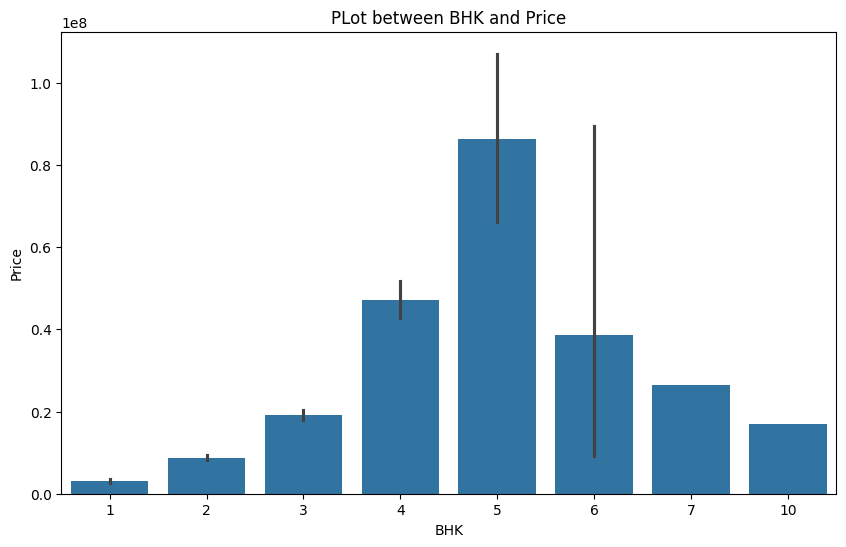

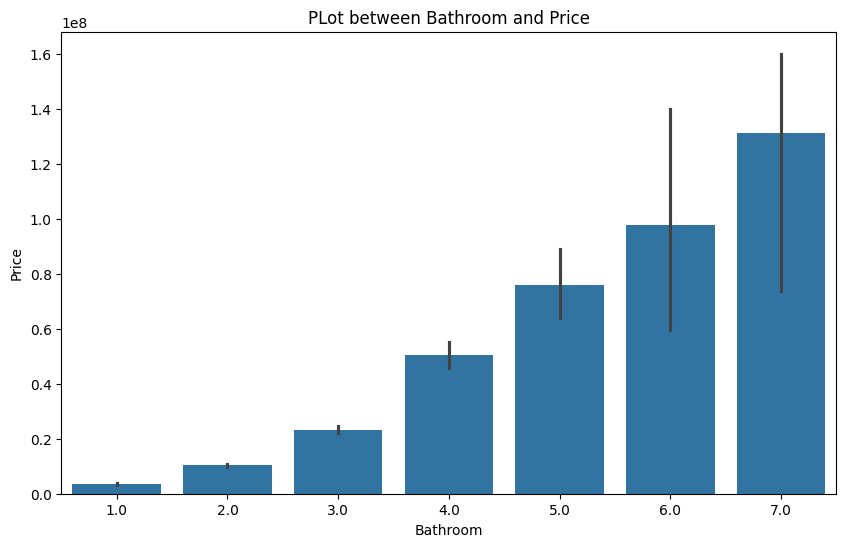

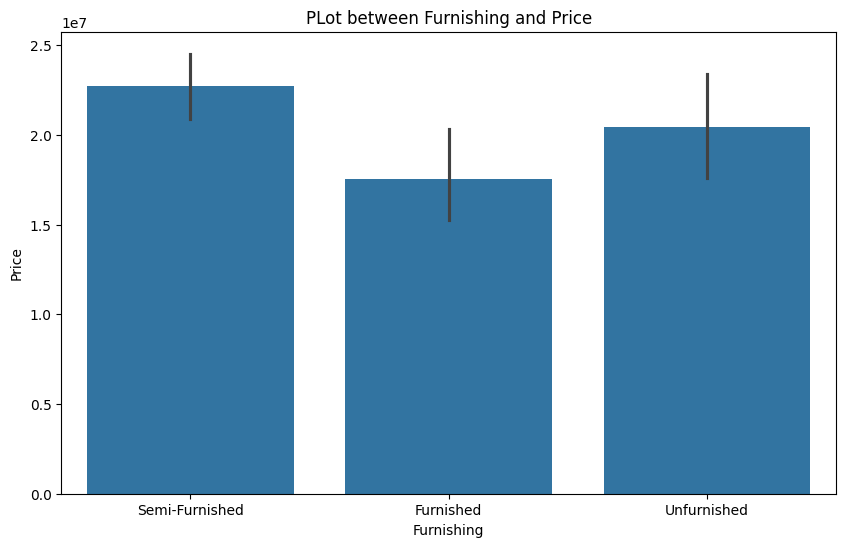

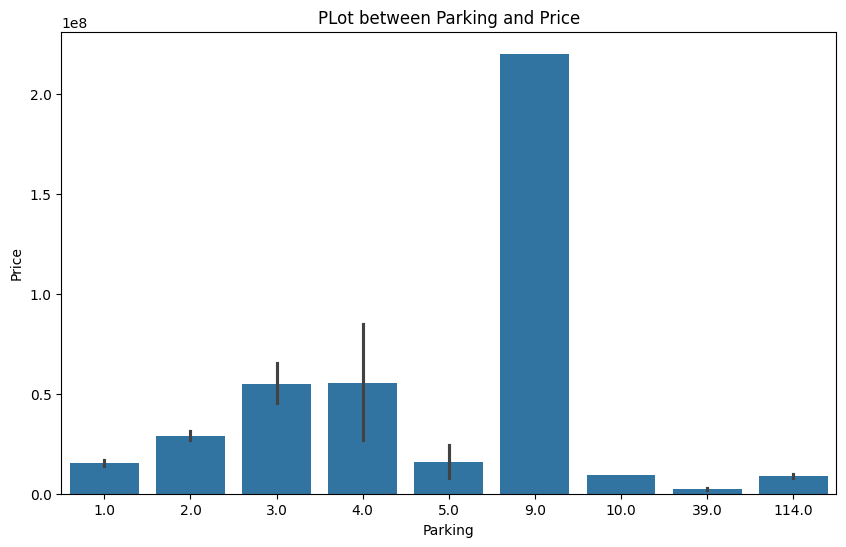

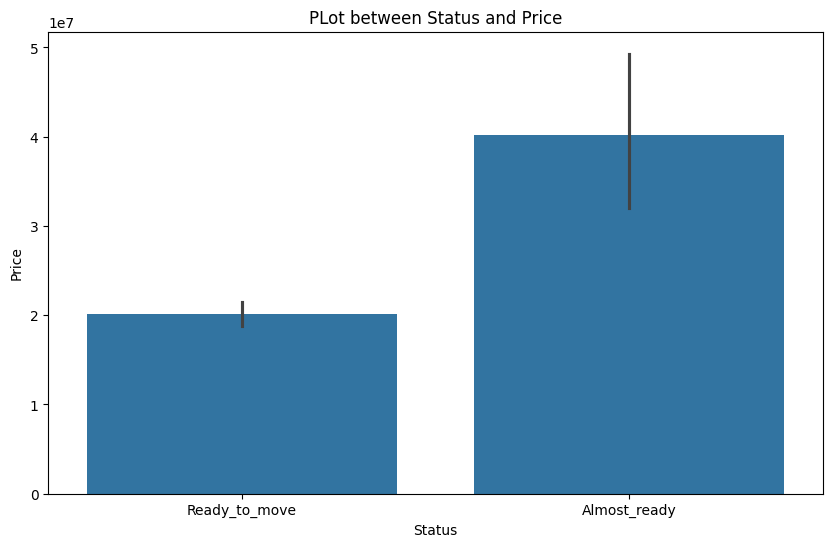

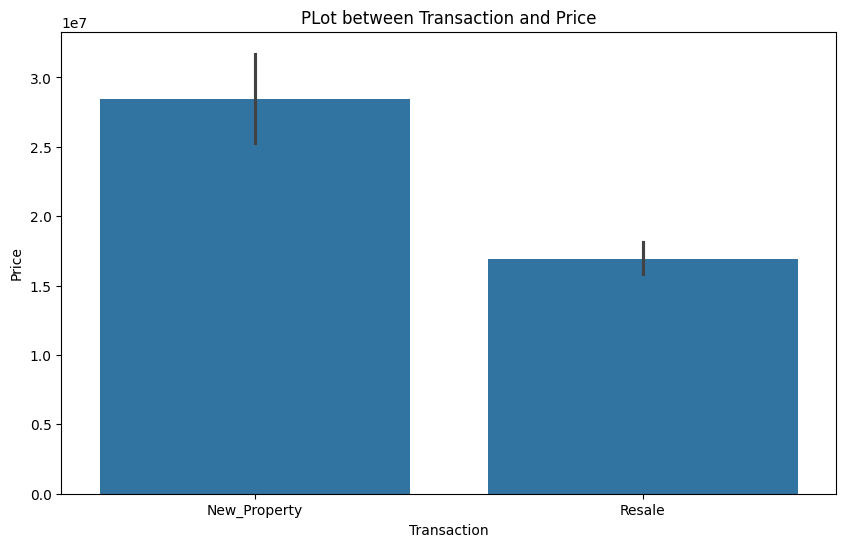

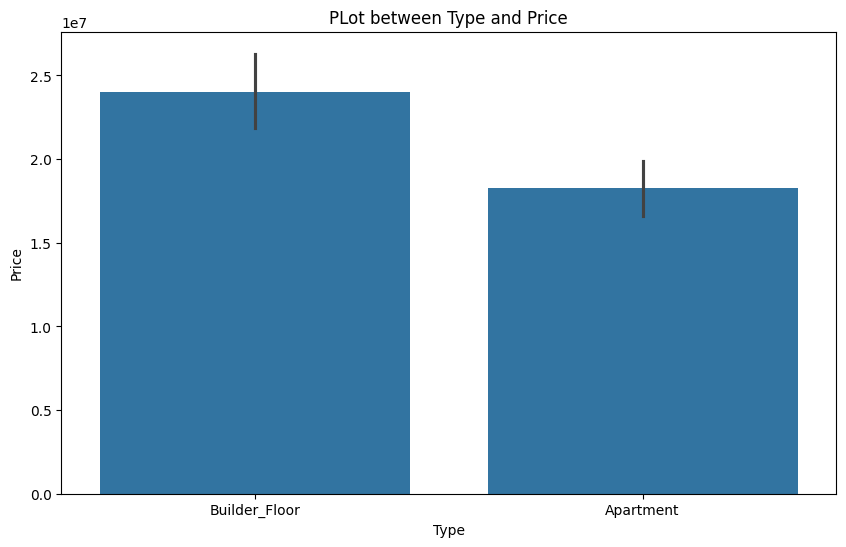

In [39]:
selected_col=[ 'BHK', 'Bathroom', 'Furnishing', 'Parking','Status', 'Transaction', 'Type']
for col in selected_col:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=df[col], y=df['Price'])
    plt.title(f"PLot between {col} and Price")
    plt.xlabel(f"{col}")
    plt.ylabel("Price")
    # plt.xticks(rotation=45)
    plt.show()

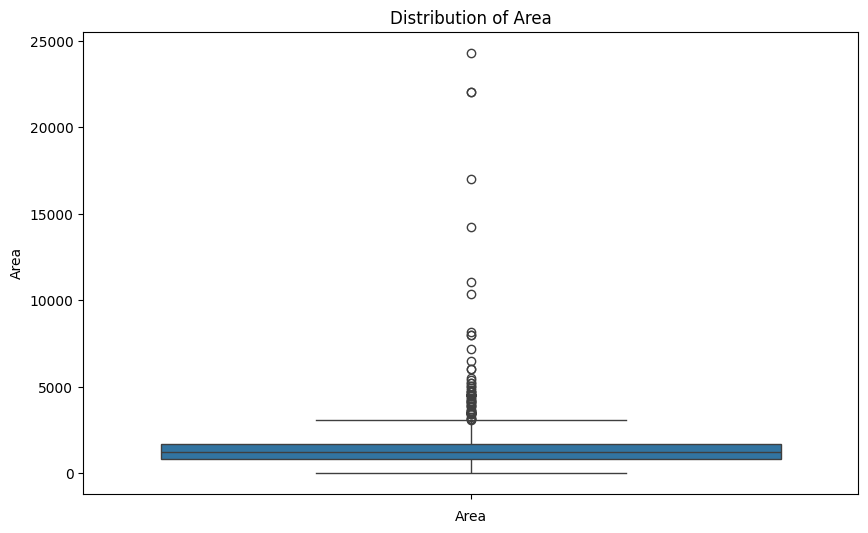

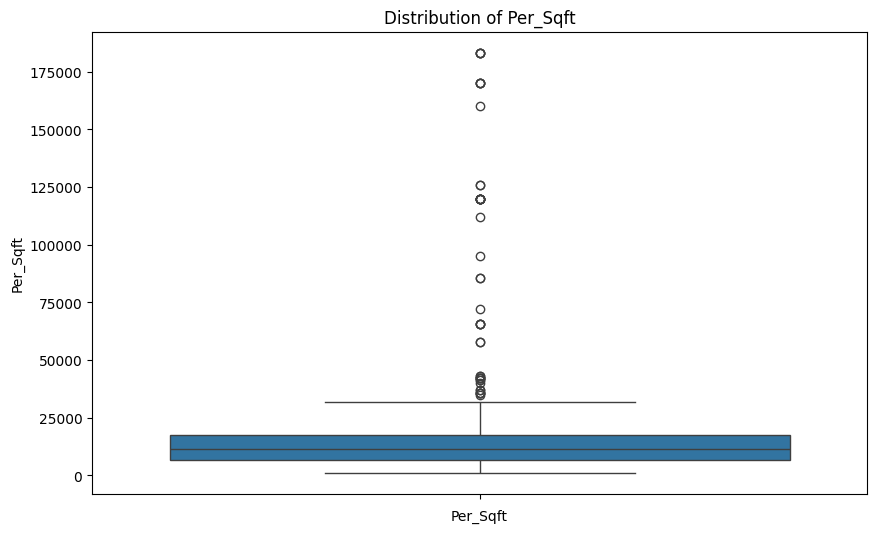

In [40]:

selected_col_new=[ 'Area', 'Per_Sqft']
for col in selected_col_new:
    plt.figure(figsize=(10, 6))
    sns.boxplot(df[col])
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()
    

# DATA PROCESSING

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [47]:
col=['Furnishing','Locality','Status','Transaction','Type']
for i in col:
    df[i]=le.fit_transform(df[i])
    

In [48]:
from sklearn.preprocessing import MinMaxScaler
MMS=MinMaxScaler()
df[['Area','Price','Per_Sqft']]=MMS.fit_transform(df[['Area','Price','Per_Sqft']])

In [49]:
df.head(10)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,0.031806,3,2.0,1,283,1.0,0.023013,1,0,1,0.037758
1,0.029746,2,2.0,1,139,1.0,0.016736,1,0,0,0.029750
2,0.037986,2,2.0,0,49,1.0,0.060669,1,1,0,0.029750
3,0.023566,2,2.0,1,281,1.0,0.013389,1,1,1,0.029750
4,0.025626,2,2.0,1,282,1.0,0.021757,1,0,1,0.029750
5,0.052406,4,3.0,1,281,1.0,0.060669,1,0,1,0.029750
6,0.054466,4,3.0,1,281,1.0,0.037657,1,1,1,0.029750
7,0.025626,2,2.0,1,93,1.0,0.012552,1,0,0,0.026933
8,0.039428,3,3.0,2,278,1.0,0.024268,0,0,1,0.026933
9,0.052406,4,4.0,1,279,1.0,0.058577,1,0,1,0.026933


# MACHINE LEARNING USING LINEAR REGRESSION

In [76]:
from sklearn.model_selection import train_test_split
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [77]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [78]:
lr.fit(X_train,y_train)

LinearRegression()

In [79]:
y_pred=lr.predict(X_test)

In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [81]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ',mse)
print('MAE: ',mae)
print('R2 Score: ',r2)

MSE:  0.005383034402484423
MAE:  0.04233647528026109
R2 Score:  0.593403970462719


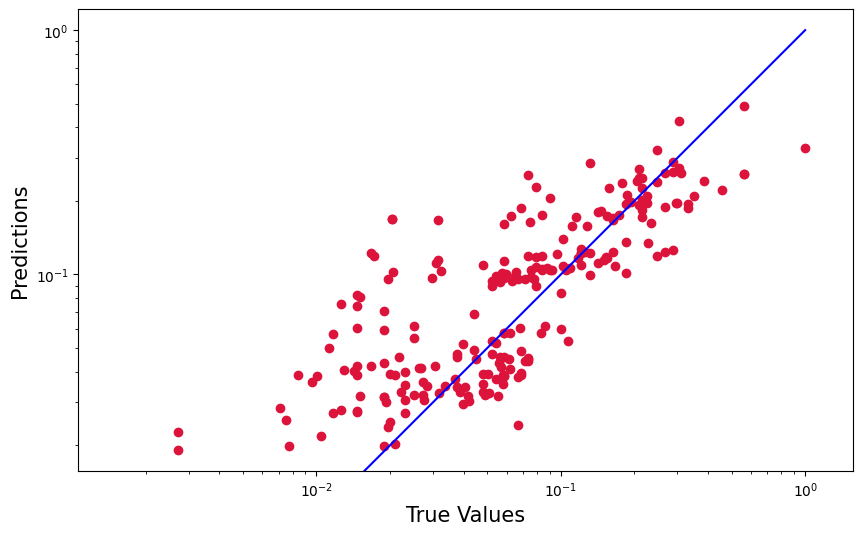

In [85]:
#Plot between predicted and true value
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()